<font size="6">**Stationarity**</font>

In [1]:

import numpy as np
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%run ../nb_config.py

running notebook configuration


In [4]:
from src.load_data import market_data
from src.mle import time_series as mle_ts
from src import utils

# Parameters

In [5]:
TAU_TARGET = 5

# Load Data

In [6]:
comm_df = market_data.read_mkt_data()[['brent']]

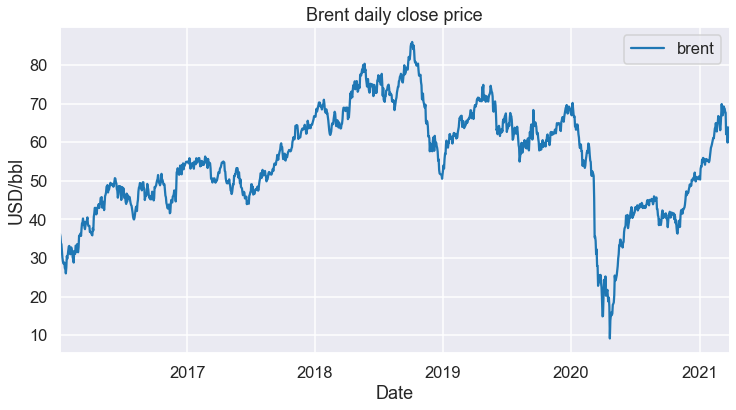

In [7]:
comm_df.plot(title='Brent daily close price')
plt.ylabel("USD/bbl")
plt.show()

In [8]:
target = mle_ts.get_targets(y=comm_df[['brent']], tau=TAU_TARGET)

In [9]:
target_adf_res = mle_ts.run_adf_test(target)
target_adf_res

,adf,pvalue
brent,-6.0703,0.0000


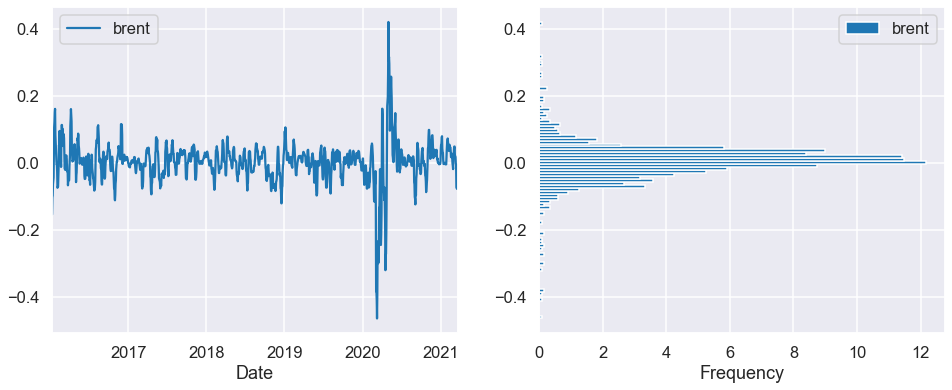

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

ax = axs[0]
target.plot(ax=ax)
ax = axs[1]
target.plot.hist(ax=ax, bins=100, orientation='horizontal', density=True)
plt.show()

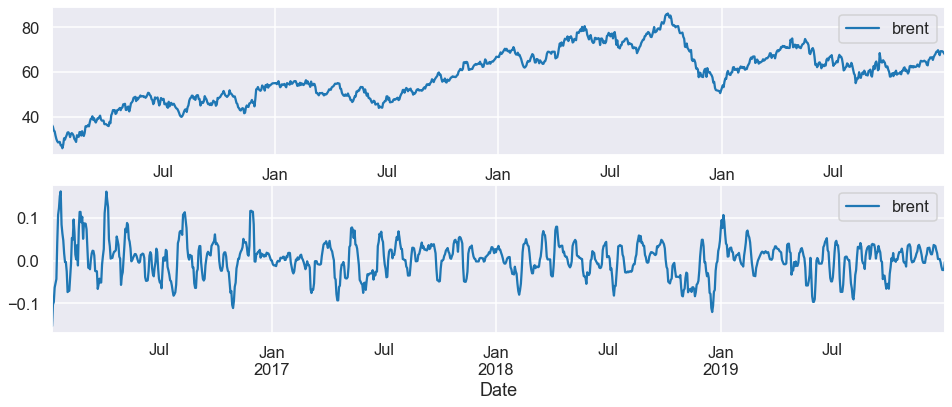

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16, 6))

ax = axs[0]
comm_df[:'2019'].plot(y ='brent', ax=ax)
ax = axs[1]
target[:'2019'].plot(ax=ax)
plt.show()

In [12]:
from statsmodels.stats.diagnostic import kstest_normal

In [13]:
kstest_normal(target)

(0.9999999999999856, 0.0009999999999998899)

In [14]:
target.kurtosis()

brent   12.8609
dtype: float64

In [15]:
target.skew()

brent   -0.9996
dtype: float64

# Addendum

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

<AxesSubplot:>

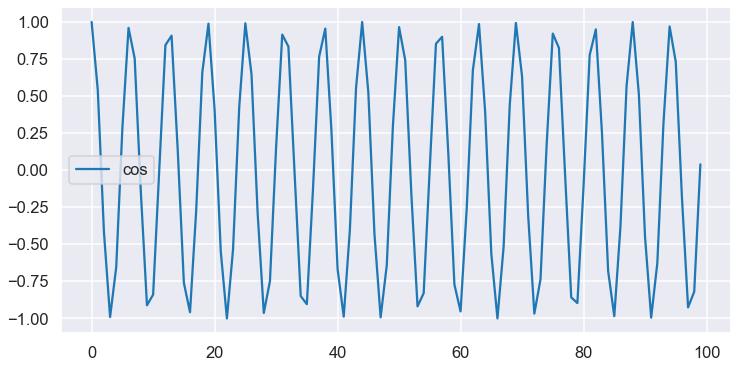

In [17]:
x_cos = pd.DataFrame(np.cos(np.arange(0, 100)), columns=['cos'])

x_cos.plot()

In [18]:
mle_ts.run_adf_test(x_cos)

,adf,pvalue
cos,"-16,101,865,820,336,810.0000",0.0000


In [19]:
from statsmodels.tsa.stattools import adfuller

adfuller(comm_df['brent'][1:], regression='nc')

(-0.020377093415018088,
 0.67745951244333,
 8,
 1356,
 {'1%': -2.5673907926097055,
  '5%': -1.9411999001347604,
  '10%': -1.6166255956347106},
 4477.97273906872)

In [20]:
import statsmodels.api as sm
import numpy as np

endog = comm_df['brent'].diff(1)[1:]
exog = comm_df['brent'].shift(1)[1:]
#exog = sm.add_constant(exog)
model = sm.OLS(endog,exog)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  brent   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                           0.009560
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                       0.922
Time:                        23:44:38   Log-Likelihood:                         -2280.5
No. Observations:                1365   AIC:                                      4563.
Df Residuals:                    1364   BIC:                                      4568.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
brent       5.985e-05      0.001      0.098      0.922      -0.001       0.001
==============================================================================
Omnibus:                      268.902   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2238.147
Skew:                          -0.669   Prob(JB):                         0.00
Kurtosis:                       9.129   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""